In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse

El nostre dataset conté les següents columnes:

1. CRIM      per capita crime rate by town

2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.

3. INDUS     proportion of non-retail business acres per town

4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX       nitric oxides concentration (parts per 10 million)

6. RM        average number of rooms per dwelling

7. AGE       proportion of owner-occupied units built prior to 1940

8. DIS       weighted distances to five Boston employment centres

9. RAD       index of accessibility to radial highways

10. TAX      full-value property-tax rate per $10,000

11. PTRATIO  pupil-teacher ratio by town

12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13. LSTAT    % lower status of the population

14. MEDV     Median value of owner-occupied homes in $1000's

Se preparán los datos tal como se hizo en M05T02, si se quiere ver el proceso explicado y con gràficos se puede consultar en https://github.com/maribelseara/SkLearn_Train_Test/blob/main/sklear_train_test.ipynb

Lectura de los datos y generación de columnas dummy

In [2]:
columnes=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT', 'MEDV']
df=pd.read_csv("housing data.csv", names=columnes)
df=pd.get_dummies(df, columns=['RAD'])
#Se elimina la última columna dummy para evitar multicolinealidad
df=df.drop(['RAD_24'], axis=1)

Estandarización de los datos, en M05T02 ya se comprobó que no eran gaussianos y algunos tenían outilers y otros no, así que se optó por RobustScaler para los atributos con outliers y MaxMinScaler para los que no.

In [3]:
atributs_amb_outliers=['CRIM', 'ZN', 'RM', 'DIS', 'B', 'LSTAT', 'MEDV']
atributs_sense_outliers=['INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO']
df_estandaritzat=df.copy()
df_estandaritzat[atributs_amb_outliers]=RobustScaler().fit_transform(df_estandaritzat[atributs_amb_outliers])
df_estandaritzat[atributs_sense_outliers]=MinMaxScaler().fit_transform(df_estandaritzat[atributs_sense_outliers])

In [4]:
df_estandaritzat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.208015,0.287234,...,-0.637681,0.351097,True,False,False,False,False,False,False,False
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.104962,0.553191,...,-0.221889,0.050157,False,True,False,False,False,False,False,False
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.104962,0.553191,...,-0.732634,1.692790,False,True,False,False,False,False,False,False
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.066794,0.648936,...,-0.841579,1.529781,False,False,True,False,False,False,False,False
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.066794,0.648936,...,-0.602699,1.880878,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0,0.386831,0.521003,0.681771,-0.236007,0.164122,0.893617,...,-0.168916,0.150470,True,False,False,False,False,False,False,False
502,-0.058759,0.00,0.420455,0,0.386831,-0.119919,0.760041,-0.297887,0.164122,0.893617,...,-0.227886,-0.075235,True,False,False,False,False,False,False,False
503,-0.054450,0.00,0.420455,0,0.386831,1.039973,0.907312,-0.336744,0.164122,0.893617,...,-0.571714,0.338558,True,False,False,False,False,False,False,False
504,-0.040867,0.00,0.420455,0,0.386831,0.793360,0.889804,-0.265053,0.164122,0.893617,...,-0.487756,0.100313,True,False,False,False,False,False,False,False


Ara, tenint el dataframe estandaritzat i amb les columnes dummy el dividim en train i test

In [5]:
noves_columnes=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','TAX','PTRATIO','B', 'LSTAT', 'MEDV', "RAD_1", "RAD_2", "RAD_3", "RAD_4", "RAD_5", "RAD_6", "RAD_7", "RAD_8"]
train, test=train_test_split(df_estandaritzat,test_size=0.33, random_state=1)
train_df=pd.DataFrame(train,columns=noves_columnes)
test_df=pd.DataFrame(test,columns=noves_columnes)

### - Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

Vamos a volver a mostrar un mapa de calor para fijarnos en qué atributo deberíamos usar para la predicción

<Axes: >

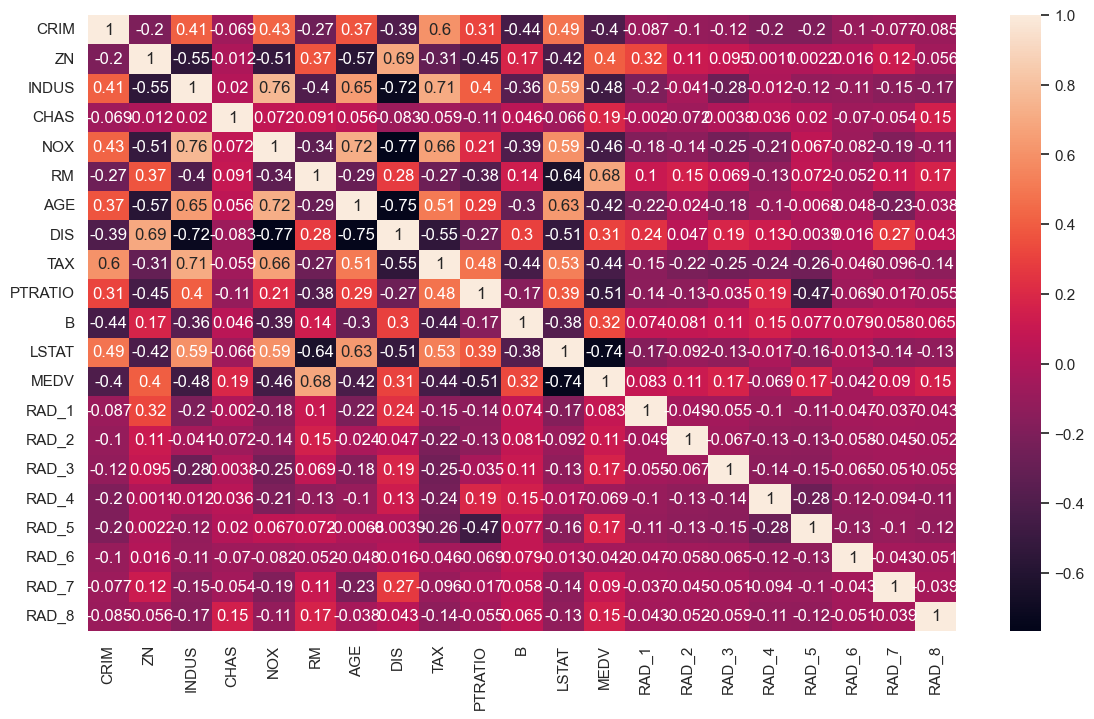

In [6]:
sns.set(rc={'figure.figsize':(14,8)})
sns.heatmap(train_df.corr(), annot=True)

Podem veure que les correlacions més significatives de "MEDV" són -0.74 amb "LSTAT" y 0.7 amb "RM". Començarem probant una regressió lineal amb "LSTAT"

In [7]:
x=np.array(train_df['LSTAT']).reshape(-1,1)
y=np.array(train_df['MEDV'])
model_lineal=LinearRegression().fit(x, y)

Una vegada entrenat el model mostrem el coeficient de determinació (R), el coeficient b₀ i el b₁.

In [8]:
print("El coeficient de determinació (R) és" ,model_lineal.score(x,y))
print("El coeficient b₀ és" , model_lineal.intercept_)
print("El coeficient b₁ és", model_lineal.coef_)

El coeficient de determinació (R) és 0.5474723349831306
El coeficient b₀ és 0.3352391027408692
El coeficient b₁ és [-1.14999956]


Fem la predicció amb les dades de test

In [9]:
x_test=np.array(test_df['LSTAT']).reshape(-1,1)
y_test=np.array(test_df['MEDV'])

In [10]:
y_predict_lineal=model_lineal.predict(x_test)
print("Les dades predites per a 'MEDV' són", y_predict_lineal)

Les dades predites per a 'MEDV' són [ 0.77546882  0.81569869 -0.51993298  0.7099516   0.46972181  0.3628253
  1.10075605  0.14213573 -0.4187836   0.62834244  0.7513309   1.11110088
  0.07661851  0.46397469  0.29385981  0.24673339 -1.03027762  1.10880203
  0.78696307 -1.75326585  0.31914715 -0.27280664  0.57431947  0.93753772
  1.10420433 -1.16246148 -0.69694441  0.43064137  0.80650329 -0.75556508
  1.00995149 -0.48085254  1.30995137 -0.24866872  0.59615854  0.07891736
 -0.40384108  1.02834229 -1.04177187 -0.08085269  0.79730789  0.86512396
  0.76742285 -1.12912815 -0.43142727 -0.97280638  1.42029616 -0.2383239
  0.51339995  0.41914712  0.30075636  0.35133105  1.04213538  0.36512415
 -1.77050722  0.86742281 -1.80384054  0.95362967 -0.04522052  1.18696292
 -0.08545039  0.8904113  -0.64866857 -0.3865997  -1.7555647   1.06167561
  1.35707779  0.64673324  0.44558389  0.30305521  0.93408945 -1.60958774
  0.03179094  0.26397476  0.02144612  0.44328504  1.30075598  0.69500908
  0.79156077  1.2

Fem una ullada a les dades reals per veure si va ben encaminat

In [11]:
print("Les dades reals són", y_test)

Les dades reals són [ 0.87774295  0.33855799 -0.57680251  0.10031348 -0.05015674  0.22570533
  0.84012539 -0.84012539  0.03761755  0.17554859  0.31347962  1.2539185
 -0.23824451 -0.22570533 -0.22570533  0.84012539 -0.9153605   3.61128527
  0.36363636 -0.82758621 -0.62695925 -0.70219436  0.32601881  0.47648903
  0.28840125 -1.61755486 -0.96551724 -0.46394984  2.7460815  -1.21630094
  0.36363636 -0.33855799  3.61128527 -1.07836991 -0.17554859  0.4137931
 -0.78996865  1.88087774 -1.1661442  -0.26332288  0.17554859 -0.06269592
  1.11598746 -0.99059561 -0.82758621 -1.60501567  3.61128527 -1.06583072
  0.47648903 -0.32601881  1.07836991  0.12539185  0.94043887  0.32601881
 -1.64263323  0.12539185 -1.86833856  0.11285266 -0.46394984  3.39811912
 -0.56426332  0.67711599 -1.59247649 -0.84012539  0.31347962  2.00626959
  2.57053292 -0.58934169  0.06269592  0.18808777  0.22570533 -1.34169279
  0.08777429 -0.02507837 -0.10031348  0.07523511  3.61128527  0.10031348
  0.26332288  2.01880878 -0.40125

De moment a simple vista no sembla que hagi encertat massa

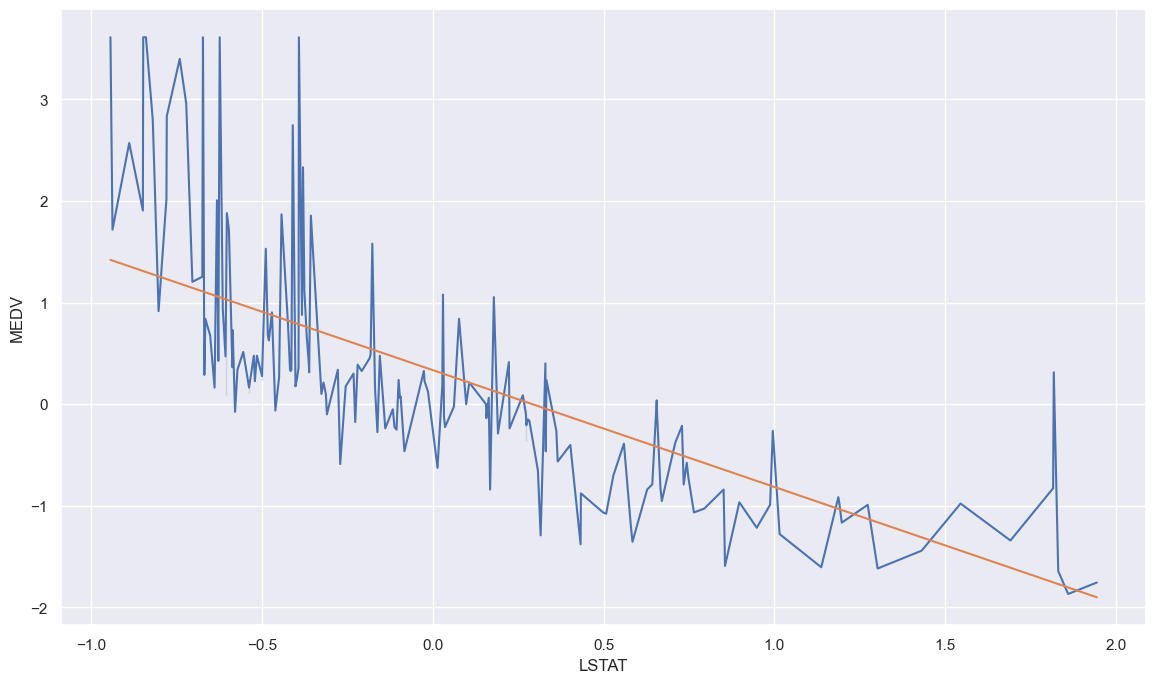

In [12]:
ax=sns.lineplot(x=test_df['LSTAT'], y=test_df['MEDV'])
ax1=sns.lineplot(x=test_df['LSTAT'], y=y_predict_lineal)

A la gràfica podem veure que si segueix bastant la tendencia al principi, però com la tendència canvia als valors superiors les prediccions s'allunyen més de la realitat.

A continuació provem una regresió polinomial.

In [13]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
trans_x=transformer.fit_transform(x)
model_polinomial=LinearRegression().fit(trans_x, y)

Amb el model ja entrenat consultarem R, b₀ i b₁


In [14]:
print("El coeficient de determinació (R) és" ,model_polinomial.score(trans_x,y))
print("El coeficient b₀ és" , model_polinomial.intercept_)
print("El coeficient b₁ és", model_polinomial.coef_)

El coeficient de determinació (R) és 0.6519827285365485
El coeficient b₀ és 0.1275323232480141
El coeficient b₁ és [-1.6767981  0.527248 ]


Fem la predicció i la comparem amb els valors reals

In [15]:
x_test_polinomial=PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test)
y_predict_polinomial=model_polinomial.predict(x_test_polinomial)
print("Les dades predites per a 'MEDV' són", y_predict_polinomial)

Les dades predites per a 'MEDV' són [ 8.46689247e-01  9.20114478e-01 -8.27822886e-01  7.29873138e-01
  3.30829943e-01  1.68058757e-01  1.47735209e+00 -1.39162799e-01
 -7.45230442e-01  5.89152196e-01  8.03253532e-01  1.49879273e+00
 -2.22893445e-01  3.21847046e-01  6.78803896e-02  1.60632390e-03
 -1.12012356e+00  1.49402077e+00  8.67536204e-01 -1.17872313e+00
  1.04172119e-01 -6.11652406e-01  4.98920091e-01  1.15036041e+00
  1.48448949e+00 -1.16197180e+00 -9.52729821e-01  2.70265595e-01
  9.03217796e-01 -9.88588235e-01  1.29281269e+00 -7.96879229e-01
  1.92751379e+00 -5.87927650e-01  5.35116684e-01 -2.20013467e-01
 -7.32337700e-01  1.32965682e+00 -1.12431560e+00 -4.10141593e-01
  8.86388535e-01  1.01208924e+00  8.32159057e-01 -1.15273241e+00
 -7.56000630e-01 -1.09758323e+00  2.17901885e+00 -5.77617683e-01
  3.99960617e-01  2.52684309e-01  7.77275688e-02  1.51099002e-01
  1.35746690e+00  1.71463350e-01 -1.17503245e+00  1.01641454e+00
 -1.16722504e+00  1.18165514e+00 -3.69502380e-01  1.65

In [16]:
print("Les dades reals són", y_test)

Les dades reals són [ 0.87774295  0.33855799 -0.57680251  0.10031348 -0.05015674  0.22570533
  0.84012539 -0.84012539  0.03761755  0.17554859  0.31347962  1.2539185
 -0.23824451 -0.22570533 -0.22570533  0.84012539 -0.9153605   3.61128527
  0.36363636 -0.82758621 -0.62695925 -0.70219436  0.32601881  0.47648903
  0.28840125 -1.61755486 -0.96551724 -0.46394984  2.7460815  -1.21630094
  0.36363636 -0.33855799  3.61128527 -1.07836991 -0.17554859  0.4137931
 -0.78996865  1.88087774 -1.1661442  -0.26332288  0.17554859 -0.06269592
  1.11598746 -0.99059561 -0.82758621 -1.60501567  3.61128527 -1.06583072
  0.47648903 -0.32601881  1.07836991  0.12539185  0.94043887  0.32601881
 -1.64263323  0.12539185 -1.86833856  0.11285266 -0.46394984  3.39811912
 -0.56426332  0.67711599 -1.59247649 -0.84012539  0.31347962  2.00626959
  2.57053292 -0.58934169  0.06269592  0.18808777  0.22570533 -1.34169279
  0.08777429 -0.02507837 -0.10031348  0.07523511  3.61128527  0.10031348
  0.26332288  2.01880878 -0.40125

Fem una representació gràfica per veure-ho més clar

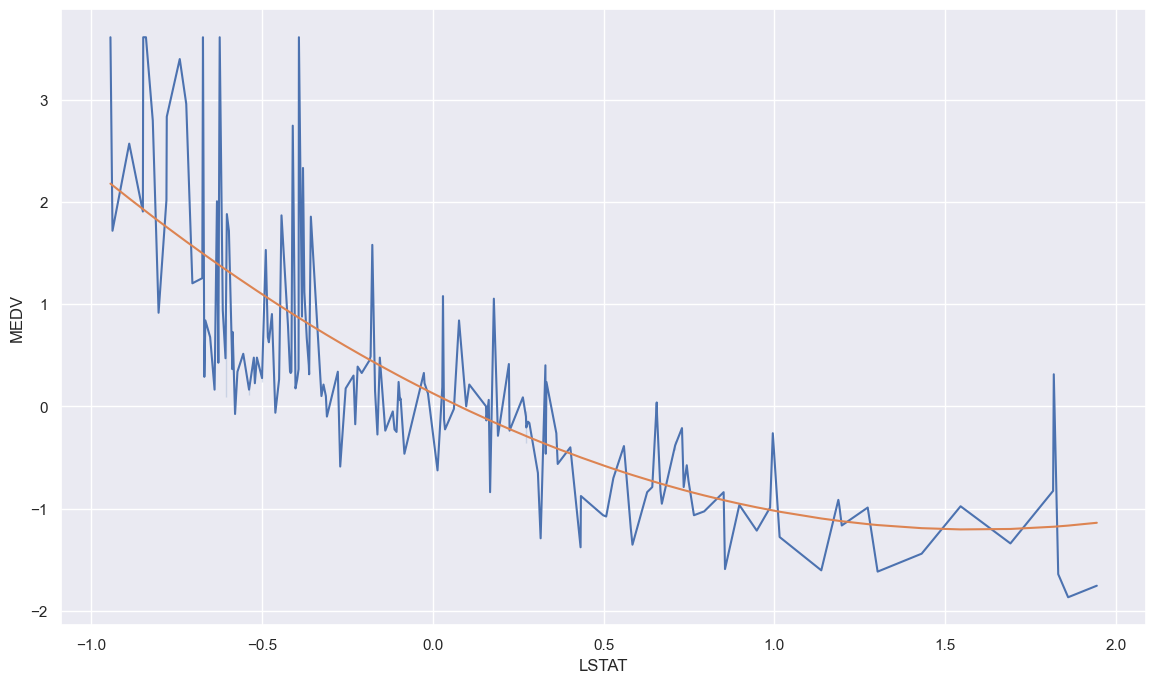

In [17]:
ax=sns.lineplot(x=test_df['LSTAT'], y=test_df['MEDV'])
ax1=sns.lineplot(x=test_df['LSTAT'], y=y_predict_polinomial)

Aquesta predicció sembla adaptar-se una mica més a la realitat de les dades.

### - Exercici 2
Compara’ls en base al MSE i al R2.

In [18]:
mse_lineal=mse(y_test, y_predict_lineal)
mse_polinomial=mse(y_test, y_predict_polinomial)
print("En el cas de la regressió lineal simple el mean squared error es", mse_lineal)
print("El el cas de la regressió polinomial el mean squared error es", mse_polinomial)

En el cas de la regressió lineal simple el mean squared error es 0.6463465399511551
El el cas de la regressió polinomial el mean squared error es 0.5310219103079198


Com podem comprobar la regressió polinomial té menys error que la regressió lineal simple. Ja ho haviem detectat amb la gràfica, però el MSE ens ho confirma.

In [19]:
r2_lineal=model_lineal.score(x,y)
r2_polinomial=model_polinomial.score(trans_x,y)
print("El coeficient de determinació (R²) a la regressió lineal simple es:", r2_lineal)
print("El coeficient de determinació (R²) a la regressió polinomial es:", r2_polinomial)

El coeficient de determinació (R²) a la regressió lineal simple es: 0.5474723349831306
El coeficient de determinació (R²) a la regressió polinomial es: 0.6519827285365485


Tenint en compte que el coeficient de determinació (R²) va del 0 al 1 on 1 indicaria un ajust perfecte del model a les dades i 0 cap ajust, podem veure que aquest indicador també reflexa que la regresió polinomial s'ha ajustat millor a les dades.

### - Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.